In [3]:
!nvidia-smi

Wed Jun 19 19:12:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

# Define the path to the folder in your Google Drive
folder_path = '/content/drive/My Drive/Computer Vision/data'

# List all files in the folder
file_names = os.listdir(folder_path)
print(file_names)

['rat_43.jpg', 'rat_47.jpg', 'rat_18.jpg', 'rat_57.jpg', 'rat_17.jpg', 'rat_55.jpg', 'rat_70.jpg', 'rat_49.jpg', 'rat_5.jpg', 'rat_6.jpg', 'rat_12.jpg', 'rat_64.jpg', 'rat_8.jpg', 'rat_13.jpg', 'rat_96.jpg', 'rat_66.jpg', 'rat_41.jpg', 'rat_3.jpg', 'rat_45.jpg', 'rat_2.jpg', 'rat_137.jpg', 'rat_74.jpg', 'rat_20.jpg', 'rat_80.jpg', 'rat_119.jpg', 'rat_53.jpg', 'rat_127.jpg', 'rat_1.jpg', 'rat_110.jpg', 'rat_7.jpg', 'rat_59.jpg', 'rat_94.jpg', 'rat_100.jpg', 'rat_78.jpg', 'rat_68.jpg', 'rat_86.jpg', 'rat_19.jpg', 'rat_88.jpg', 'rat_123.jpg', 'rat_121.jpg', 'rat_129.jpg', 'rat_84.jpg', 'rat_104.jpg', 'rat_51.jpg', 'rat_151.jpg', 'rat_117.jpg', 'rat_98.jpg', 'rat_11.jpg', 'rat_92.jpg', 'rat_76.jpg', 'rat_82.jpg', 'rat_102.jpg', 'rat_147.jpg', 'rat_108.jpg', 'rat_145.jpg', 'rat_196.jpg', 'rat_143.jpg', 'rat_190.jpg', 'rat_106.jpg', 'rat_72.jpg', 'rat_115.jpg', 'rat_153.jpg', 'rat_172.jpg', 'rat_180.jpg', 'rat_131.jpg', 'rat_241.jpg', 'rat_288.jpg', 'rat_141.jpg', 'rat_166.jpg', 'rat_125.jpg

In [7]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO

# we use latest Grounding DINO model API that is not official yet
#!git checkout feature/more_compact_inference_api

!pip install -q -e .
!pip install -q roboflow #dataclasses-json onemetric

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 443 (delta 156), reused 137 (delta 128), pack-reused 232
Receiving objects: 100% (443/443), 12.86 MiB | 36.39 MiB/s, done.
Resolving deltas: 100% (228/228), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━

In [8]:
import supervision as sv
print(sv.__version__)

0.21.0


In [9]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [10]:
# download weights file

%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [11]:
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [12]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate, Model
grounding_dino_model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [12]:
IMAGE_PATH = "/content/drive/MyDrive/Computer Vision/data/rat_20.jpg"
TEXT_PROMPT = "rat"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


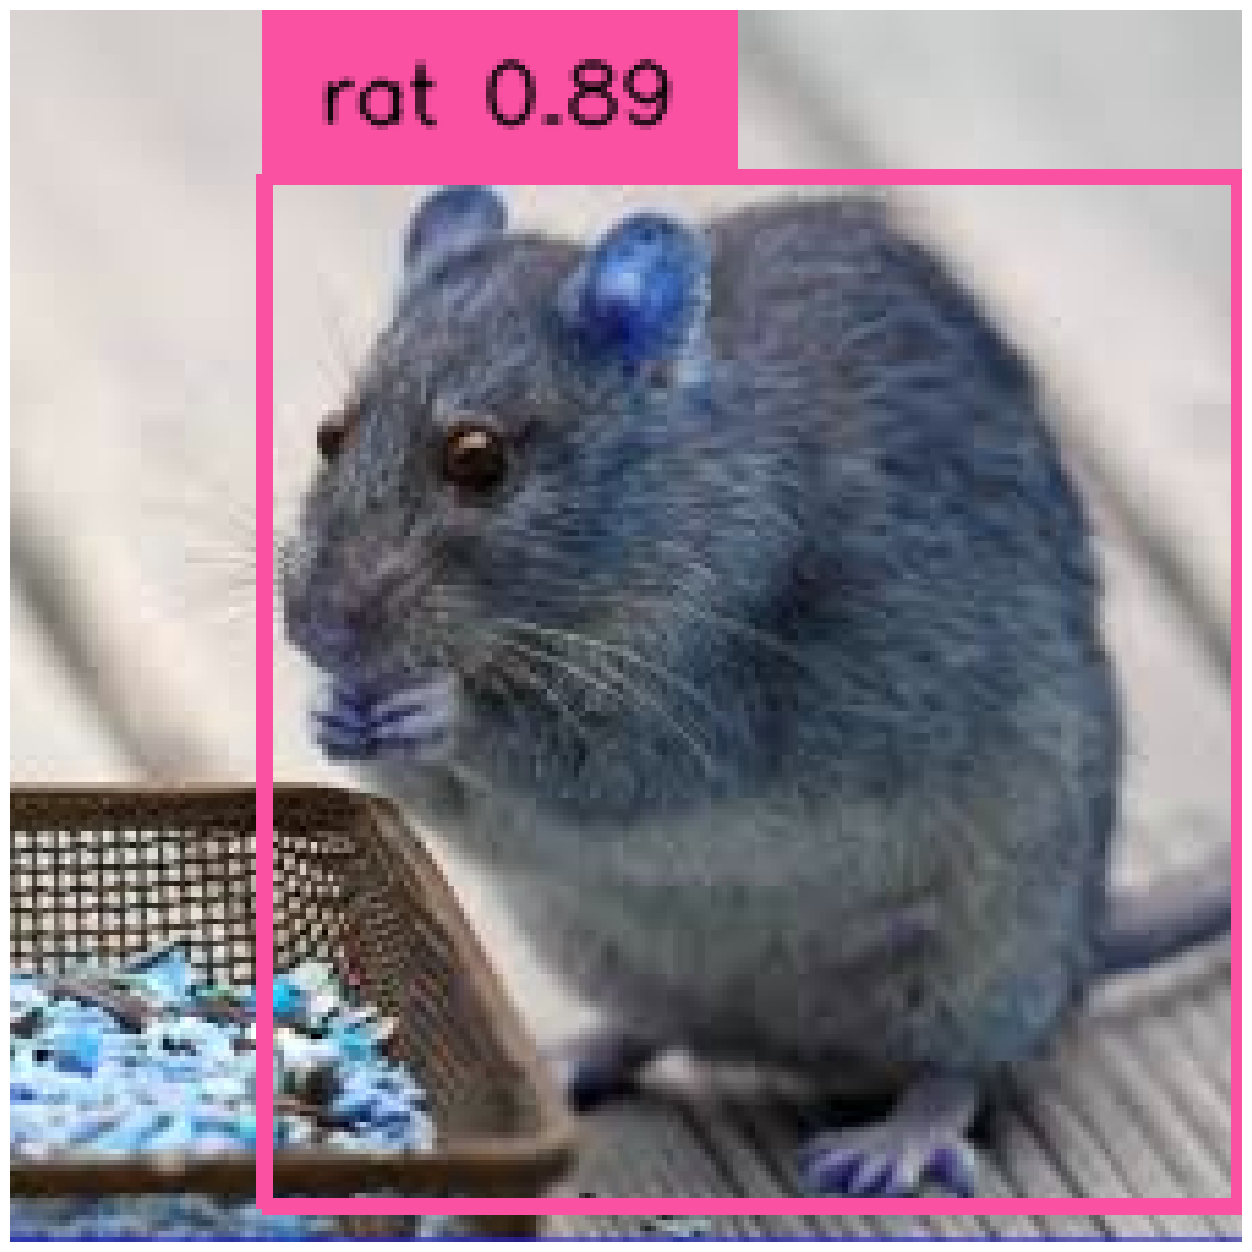

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=grounding_dino_model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source,boxes=boxes, logits=logits, phrases=phrases)

# Display example annotated image
plt.figure(figsize=(16, 16))
plt.imshow(annotated_frame)
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
IMAGE_PATH = "/content/drive/MyDrive/Computer Vision/rat_23.jpg"

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=grounding_dino_model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source,boxes=boxes, logits=logits, phrases=phrases)

# Display example annotated image
plt.figure(figsize=(16, 16))
plt.imshow(annotated_frame)
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
import random

# Select a random item
random_file = random.choice(file_names)

print(random_file)

In [ ]:
TEXT_PROMPT = "rat"

image_path = os.path.join("/content/drive/MyDrive/Computer Vision", random_file)
print(image_path)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the output directory
output_directory = "/content/drive/MyDrive/Annotated2 Images"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

In [ ]:
for file in file_names:
  image_path = os.path.join("/content/drive/MyDrive/Computer Vision", file)
  image_source, image = load_image(image_path)

  boxes, logits, phrases = predict(
      model=model,
      image=image,
      caption=TEXT_PROMPT,
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD
  )

  annotated_frame = annotate(image_source=image_source,boxes=boxes, logits=logits, phrases=phrases)

  # Display and save the annotated image
  plt.figure(figsize=(16, 16))
  plt.imshow(annotated_frame)
  plt.axis('off')  # Hide the axes

  # Save the plot
  output_image_path = os.path.join(output_directory, f"annotated_{file}.png")
  plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
  plt.close()

In [13]:
import os

IMAGES_DIRECTORY = "/content/drive/MyDrive/Computer Vision/data"
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']

CLASSES = ['rat']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [14]:
import cv2
from tqdm.notebook import tqdm

grounding_dino_model = Model(CONFIG_PATH, WEIGHTS_PATH)

images = {}
annotations = {}

image_paths = sv.list_files_with_extensions(
    directory=IMAGES_DIRECTORY,
    extensions=IMAGES_EXTENSIONS)

for image_path in tqdm(image_paths):
    image_name = image_path.name
    image_path = str(image_path)
    image = cv2.imread(image_path)

    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=CLASSES,
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )
    detections = detections[detections.class_id != None]
#    detections.mask = segment(
#        sam_predictor=sam_predictor,
#        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
#        xyxy=detections.xyxy
#    )
    images[image_name] = image
    annotations[image_name] = detections

final text_encoder_type: bert-base-uncased


  0%|          | 0/444 [00:00<?, ?it/s]

In [17]:
type(annotations)

dict

In [56]:
import json
import yaml

In [68]:
#ANNOTATIONS_DIRECTORY = "/content/drive/MyDrive/annotations"
#IMAGES_DIRECTORY = "/content/drive/MyDrive/images"

%cd {HOME}/drive/MyDrive/Annotations

for key, value in annotations.items():
  diction = {key: value}
  with open(f'{key}.yml', 'w') as outfile:
    yaml.dump(diction, outfile, default_flow_style=False)


/content/drive/MyDrive/Annotations


In [ ]:
dataset = sv.DetectionDataset(
    classes=CLASSES,
    images=images,
    annotations=annotations)

In [69]:
PROJECT_NAME = "rats"
PROJECT_DESCRIPTION = "rat-detector"

import roboflow
from roboflow import Roboflow

roboflow.login()

workspace = Roboflow().workspace()
new_project = workspace.create_project(
    project_name=PROJECT_NAME,
    project_license="MIT",
    project_type="object-detection",
    annotation=PROJECT_DESCRIPTION)


You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


In [84]:
ANNOTATIONS_DIRECTORY = "/content/drive/MyDrive/Annotations"
IMAGES_DIRECTORY = "/content/drive/MyDrive/Computer Vision/data"

for image_path in tqdm(image_paths):
    image_name = image_path.name
    annotation_name = f"{image_path.stem}.jpg.yml"
    #image_path = str(image_path)
    annotation_path = os.path.join(ANNOTATIONS_DIRECTORY, annotation_name)
    new_project.upload(
      image_path=IMAGES_DIRECTORY,
      annotation_path=ANNOTATIONS_DIRECTORY,
      split="train",
      is_prediction=True,
      overwrite=True,
      tag_names=["auto-annotated"],
      batch_name="auto-annotated"
      )


  0%|          | 0/444 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'rat_43.jpg'